In [229]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)

In [231]:
def mse(y, output):
    return np.mean((y - output) ** 2)

# Vanilla GD


Weights actualizados usando el gradiente sobre el dataset entero:

$$
\mathbf{W} \leftarrow \mathbf{W}-\eta \cdot \nabla_{\mathbf{W}} J(\mathbf{W} ; \mathbf{X}, \mathbf{y})
$$

Donde:

- $W$ weights.
- $\eta$ learning rate.
- $J$ pérdida.
- $\nabla_{\mathrm{W}} J$ gradiente de la función de pérdida con respecto a los weights, calculado usando el dataset entero $\mathbf{X}$ y los labels $\mathbf{y}$.


In [266]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicializa los weights y biases

        # W1: weights de la layer de entrada a la layer oculta
        # b1: biases de la layer oculta
        # W2: weights de la layer oculta a la layer de salida
        # b2: biases de la layer de salida
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

    def forward(self, X):
        # Suma ponderada de los inputs y biases para la layer oculta
        self.z1 = X @ self.W1 + self.b1
        # Aplica la sigmoidea a la suma ponderada
        self.a1 = sigmoid(self.z1)
        # Suma ponderada de las salidas de la layer oculta y los biases para la layer de salida
        self.z2 = self.a1 @ self.W2 + self.b2
        # sigmoidea a la suma ponderada de la layer de salida
        output = sigmoid(self.z2)
        return output

    def backward(self, X, y, output):
        # Error entre la salida predicha y los labels verdaderos
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # Error de layer capa oculta propagando el delta
        hidden_error = output_delta @ self.W2.T
        # Delta de la layer oculta usando la derivada de la sigmoidal
        hidden_delta = hidden_error * sigmoid_derivative(self.a1)

        # Gradientes para los weights/biases
        # Gradiente de W2 usando el producto de las salidas de la layer oculta y el delta de salida
        self.W2_gradient = self.a1.T @ output_delta

        # Gradiente de b2 sumando el delta de salida
        self.b2_gradient = np.sum(output_delta, axis=0)

        # Gradiente de W1 usando el producto del input X y el delta oculto
        self.W1_gradient = X.T @ hidden_delta

        # gradiente DE b1 sumando el delta oculto
        self.b1_gradient = np.sum(hidden_delta, axis=0)

    def update_weights(self, learning_rate):
        # Actualiza weights y biases con gradient descent
        self.W2 += learning_rate * self.W2_gradient
        self.b2 += learning_rate * self.b2_gradient
        self.W1 += learning_rate * self.W1_gradient
        self.b1 += learning_rate * self.b1_gradient

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)

            # MSE - Pérdida
            loss = mse(y, output)
            losses.append(loss)

            self.backward(X, y, output)

            self.update_weights(learning_rate)

            if (epoch + 1) % 1000 == 0:
                print(f"Epoch: {epoch + 1}, MSE: {loss}")
        return losses

    def predict(self, X):
        # Make predictions using the trained network
        return self.forward(X)

In [267]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 2
output_size = 1
epochs = 10000
learning_rate = 0.1

nn = NeuralNetwork(input_size, hidden_size, output_size)
losses = nn.train(X, y, epochs, learning_rate)

Epoch: 1000, MSE: 0.1945636664724581
Epoch: 2000, MSE: 0.12945217605735349
Epoch: 3000, MSE: 0.03687601184694807
Epoch: 4000, MSE: 0.014304490350781362
Epoch: 5000, MSE: 0.008102547377053368
Epoch: 6000, MSE: 0.005484586613667599
Epoch: 7000, MSE: 0.004088965003541905
Epoch: 8000, MSE: 0.0032353328764239075
Epoch: 9000, MSE: 0.002664389311726568
Epoch: 10000, MSE: 0.0022579094297399127


In [268]:
predictions = nn.forward(X)
print("\nPredicciones:")
for i, (X_l, y_l, pred) in enumerate(zip(X, y, predictions)):
    print(f"Input: {X_l} - Real: {y_l[0]} - Predicción: {pred[0]:.4f}")


Predicciones:
Input: [0 0] - Real: 0 - Predicción: 0.0408
Input: [0 1] - Real: 1 - Predicción: 0.9549
Input: [1 0] - Real: 1 - Predicción: 0.9548
Input: [1 1] - Real: 0 - Predicción: 0.0573


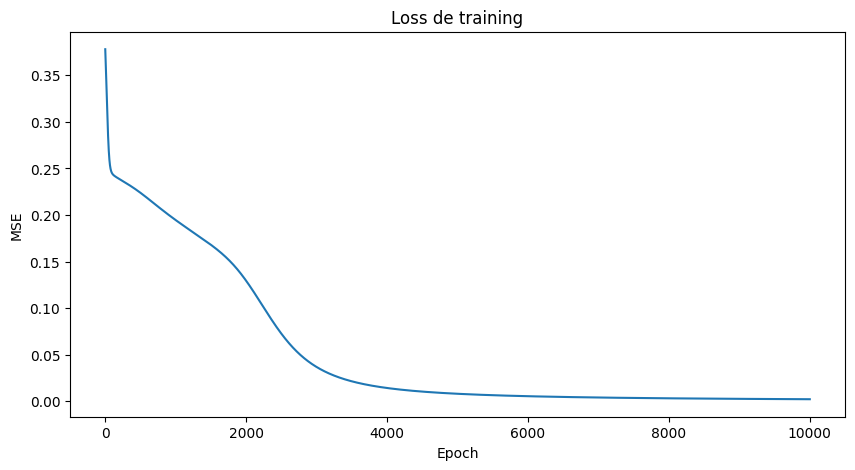

In [269]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(epochs), y=losses)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Loss de training")
plt.show()

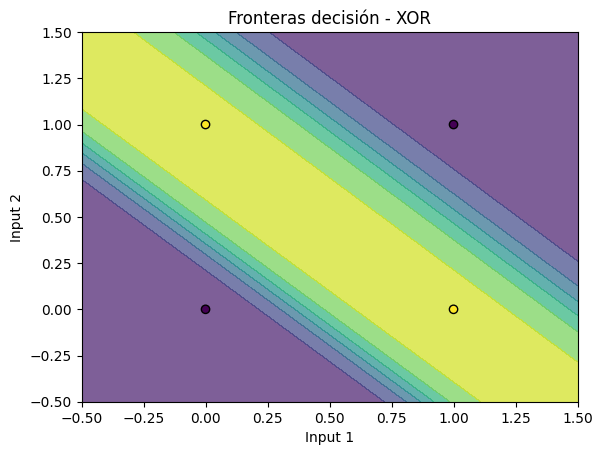

In [270]:
grid = np.mgrid[-0.5:1.5:100j, -0.5:1.5:100j].reshape(2, -1).T
predictions = nn.forward(grid).reshape(100, 100)

plt.contourf(
    grid[:, 0].reshape(100, 100), grid[:, 1].reshape(100, 100), predictions, alpha=0.7
)
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap="viridis", edgecolors="k")
plt.title("Fronteras decisión - XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

plt.show()

# Minibatch


Weights se actualizan para cada batch del dataset:

$$
\mathbf{W} \leftarrow \mathbf{W}-\eta \cdot \nabla_{\mathbf{W}} J\left(\mathbf{W} ; \mathbf{X}_{\text {batch }}, \mathbf{y}_{\text {batch }}\right)
$$

Donde:

- $W$ weights.
- $\eta$ learning rate.
- $J$ pérdida.
- $\nabla_{\mathrm{W}} J$ gradiente de la función de pérdida.
- $\mathbf{X}_{\text {batch }}$ y $\mathbf{y}_{\text {batch }}$ son subsets de los datos de training.


In [271]:
class DenseLayer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size)
        self.biases = np.random.randn(output_size)

    def forward(self, inputs):
        self.inputs = inputs
        # Suma ponderada de inputs y weights + sesgos
        self.weighted_sum = inputs @ self.weights + self.biases
        # Aplica sigmoidea a la suma ponderada
        self.output = sigmoid(self.weighted_sum)
        return self.output

    def backward(self, delta):
        self.delta = delta * sigmoid_derivative(self.output)
        # Gradiente de los weights con chain rule
        self.weights_gradient = self.inputs.T @ self.delta
        # Gradiente de los biases sumando los deltas
        self.biases_gradient = np.sum(self.delta, axis=0)

        # Propaga el error hacia atrás multiplicando los deltas por los weights transpuestos
        return self.delta @ self.weights.T

    def update_weights(self, learning_rate):
        # Actualiza weights y biases con gradient descent
        self.weights += learning_rate * self.weights_gradient
        self.biases += learning_rate * self.biases_gradient

In [272]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_layer = DenseLayer(input_size, hidden_size)
        self.output_layer = DenseLayer(hidden_size, output_size)

    def forward(self, X):
        hidden_output = self.hidden_layer.forward(X)
        output = self.output_layer.forward(hidden_output)
        return output

    def backward(self, X, y, output):
        # Backprop a traves de las layers
        output_error = y - output
        output_delta = self.output_layer.backward(output_error)
        self.hidden_layer.backward(output_delta)

    def update_weights(self, learning_rate):
        # Actualiza weights y biases de las layers
        self.hidden_layer.update_weights(learning_rate)
        self.output_layer.update_weights(learning_rate)

    def train(self, X, y, epochs, learning_rate, batch_size):
        n_samples = X.shape[0]
        losses = []
        for epoch in range(epochs):
            # Shuffle de los datos de training en cada epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Divide los datos en minibatches y entrena por batch
            for start_idx in range(0, n_samples, batch_size):
                end_idx = min(start_idx + batch_size, n_samples)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]

                output = self.forward(X_batch)

                # MSE como función de pérdida
                loss = mse(y_batch, output)
                losses.append(loss)

                # Backprop y actualización de weights
                self.backward(X_batch, y_batch, output)
                self.update_weights(learning_rate)

            if (epoch + 1) % 1000 == 0:
                print(
                    f"Epoch: {epoch + 1}, MSE: {np.mean(losses[-(n_samples // batch_size):])}"
                )

        return losses

In [273]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 2
output_size = 1
model = NeuralNetwork(input_size, hidden_size, output_size)

epochs = 10000
batch_size = 2
learning_rate = 0.1
losses = model.train(X, y, epochs, learning_rate, batch_size)


predictions = model.forward(X)
print("\nPredicciones:")
for i, (X, y, pred) in enumerate(zip(X, y, predictions)):
    print(f"Input: {X} - Real: {y[0]} - Predicción: {pred[0]:.4f}")

Epoch: 1000, MSE: 0.25020179024973754
Epoch: 2000, MSE: 0.25407406447761993
Epoch: 3000, MSE: 0.2523539495010033
Epoch: 4000, MSE: 0.2370275696368695
Epoch: 5000, MSE: 0.18770591625268898
Epoch: 6000, MSE: 0.06213417143333233
Epoch: 7000, MSE: 0.01657533690606681
Epoch: 8000, MSE: 0.00852293054517663
Epoch: 9000, MSE: 0.005550096704988426
Epoch: 10000, MSE: 0.004065307667981204

Predicciones:
Input: [0 0] - Real: 0 - Predicción: 0.0703
Input: [0 1] - Real: 1 - Predicción: 0.9418
Input: [1 0] - Real: 1 - Predicción: 0.9367
Input: [1 1] - Real: 0 - Predicción: 0.0625
